<a href="https://colab.research.google.com/github/pachterlab/gget_examples/blob/dev/gget_elm_IUPred3_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filter results returned by `gget.elm` using the [IUPred3](https://iupred.elte.hu/) API
This tutorials shows how results returned by `gget.elm` can be filtered based on IUPred scores to identify disordered protein regions.

Install and import software:

In [1]:
!pip install -q mysql-connector-python==8.0.29
!pip install -q git+https://github.com/pachterlab/gget.git@dev

import gget
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Download the ELM database for use with `gget.elm`:

In [2]:
gget.setup("elm")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 87336  100 87336    0     0   105k      0 --:--:-- --:--:-- --:--:--  105k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  914k  100  914k    0     0   476k      0  0:00:01  0:00:01 --:--:--  476k
100 2123k  100 2123k    0     0   703k      0  0:00:03  0:00:03 --:--:--  703k


Get IUPred scores for a UniProt Accession:

In [3]:
# Define the UniProt Accession
uniprot_acc = "P04637"

# Define IUPred type ("long" or "short")
disorder = "long"

In [22]:
# Get IUPred2A scores using the IUPred3 API
url = f"http://iupred3.elte.hu/iupred3/{disorder}/{uniprot_acc}.json"

r = requests.get(url)
r.status_code

200

Plot the IUPred2A scores (residues with a predicted score above 0.5 are considered disordered, while residues with lower scores considered to be ordered):

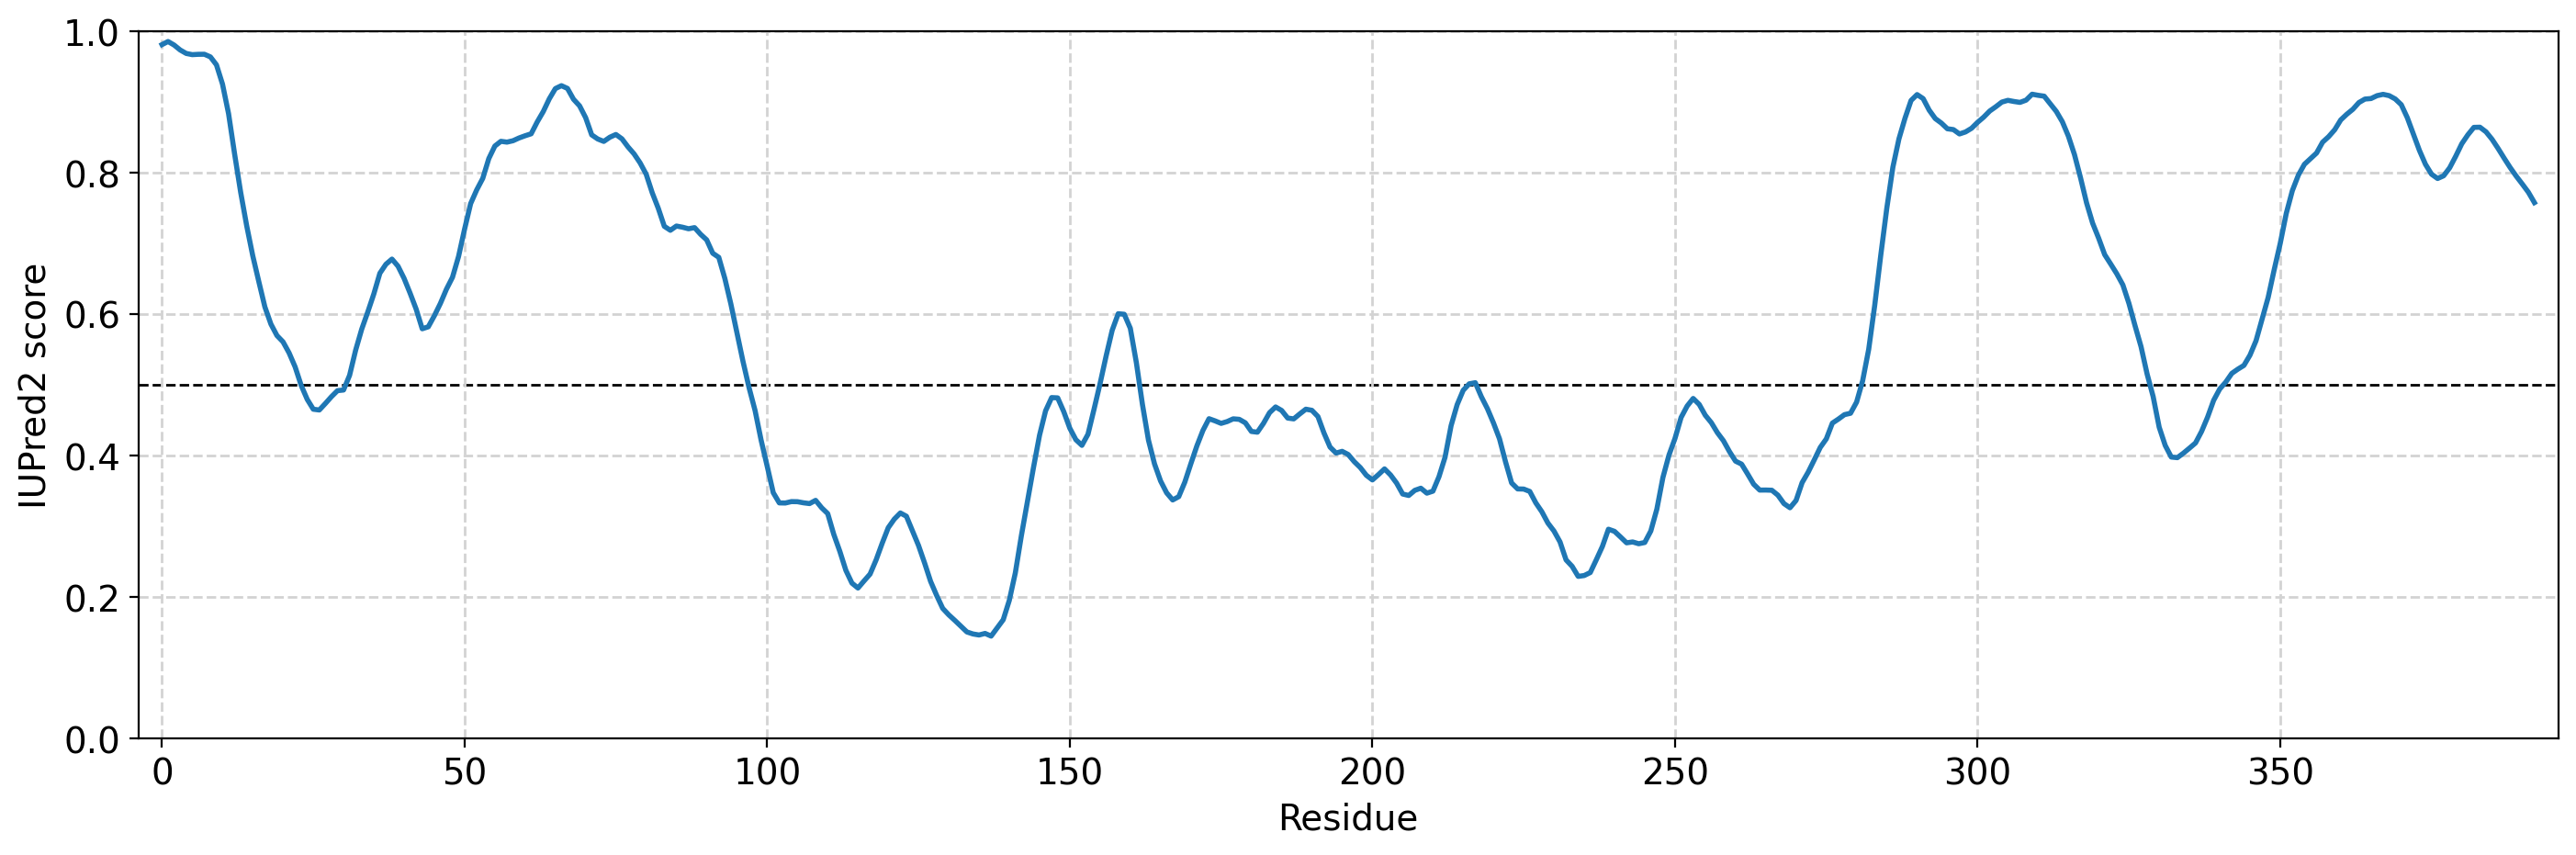

In [33]:
fig, ax = plt.subplots(figsize=(17,5))
fontsize = 14

# Plot IUPred2 scores returned by API
scores = r.json()["iupred2"]
ax.plot(np.arange(len(scores)), scores, lw=2)

# Set x and y axis labels
ax.set_xlabel("Residue", fontsize=fontsize)
ax.set_ylabel("IUPred2 score", fontsize=fontsize)

ax.axhline(0.5, color="black", lw=1, ls="--", zorder=-1)

ax.set_ylim(0,1)
ax.margins(x=0.01)
ax.tick_params(axis="both", labelsize=fontsize)
ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
ax.set_axisbelow(True)

fig.show()

Find putative ELMs for the UniProt Accession using `gget elm`:

In [34]:
ortho, regex = gget.elm(uniprot_acc, uniprot=True)

Filter the ELMs returned by `gget elm` based on the IUPred3 scores:

In [ ]:
# Get all ordered residues


In [35]:
regex

,Instance_accession,ELMIdentifier,FunctionalSiteName,ELMType,Description,Regex,Instances (Matched Sequence),motif_start_in_query,motif_end_in_query,InstanceLogic,#Instances,#Instances_in_PDB
0,ELME000321,CLV_C14_Caspase3-7,Caspase cleavage motif,CLV,Caspase-3 and Caspase-7 cleavage site.,[DSTE][^P][^DEWHFYC]D[GSAN],,183,182,true positive,41,0
1,ELME000321,CLV_C14_Caspase3-7,Caspase cleavage motif,CLV,Caspase-3 and Caspase-7 cleavage site.,[DSTE][^P][^DEWHFYC]D[GSAN],,349,348,true positive,41,0
2,ELME000321,CLV_C14_Caspase3-7,Caspase cleavage motif,CLV,Caspase-3 and Caspase-7 cleavage site.,[DSTE][^P][^DEWHFYC]D[GSAN],,388,387,true positive,41,0
3,ELME000102,CLV_NRD_NRD_1,NRD cleavage site,CLV,N-Arg dibasic convertase (NRD/Nardilysin) clea...,(.RK)|(RR[^KR]),,174,173,true positive,2,0
4,ELME000102,CLV_NRD_NRD_1,NRD cleavage site,CLV,N-Arg dibasic convertase (NRD/Nardilysin) clea...,(.RK)|(RR[^KR]),,248,247,true positive,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
176,ELME000278,TRG_NLS_MonoExtC_3,NLS classical Nuclear Localization Signals,TRG,Monopartite variant of the classical basically...,[^DE]((K[RK])|(RK))(([^DE][KR])|([KR][^DE]))((...,,318,317,true positive,23,2
177,ELME000271,TRG_NLS_MonoExtN_4,NLS classical Nuclear Localization Signals,TRG,Monopartite variant of the classical basically...,"(([PKR].{0,1}[^DE])|([PKR]))((K[RK])|(RK))(([^...",,316,315,true positive,28,2
178,ELME000271,TRG_NLS_MonoExtN_4,NLS classical Nuclear Localization Signals,TRG,Monopartite variant of the classical basically...,"(([PKR].{0,1}[^DE])|([PKR]))((K[RK])|(RK))(([^...",,318,317,true positive,28,2
179,ELME000462,TRG_Pf-PMV_PEXEL_1,Apicomplexan export motif,TRG,"Plasmodium Export Element, PEXEL, is a traffic...",(R.[LI].[EDQ])|(R.L..[EDQ])|(K.L.E),,24,23,true positive,24,0


**IUPred3 references:**

*Primary citations*

Gábor Erdős, Mátyás Pajkos, Zsuzsanna Dosztányi
IUPred3: prediction of protein disorder enhanced with unambiguous experimental annotation and visualization of evolutionary conservation
Nucleic Acids Research 2021;49(W1):W297-W303.

Bálint Mészáros, Gábor Erdős, Zsuzsanna Dosztányi
IUPred2A: context-dependent prediction of protein disorder as a function of redox state and protein binding
Nucleic Acids Research 2018;46(W1):W329-W337.

Gábor Erdős, Zsuzsanna Dosztányi
Analyzing Protein Disorder with IUPred2A
Current Protocols in Bioinformatics 2020;70(1):e99

*Additional citations*

Zsuzsanna Dosztányi
Prediction of protein disorder based on IUPred
Protein Science 2017;27:331-340.

Dosztányi Z, Csizmók V, Tompa P, Simon I.
The pairwise energy content estimated from amino acid composition discriminates between folded and intrinsically unstructured proteins
J Mol Biol. 2005;347:827-39.

Mészáros B, Simon I, Dosztányi Z.
Prediction of protein binding regions in disordered proteins
PLoS Comput Biol. 2009;5:e1000376.